# Notebook for testing random plotting stuff

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
in_array = np.linspace(-5, 5, 100) 
out_array = np.tanh(in_array) 

bins = np.linspace(-1, 1, 10)

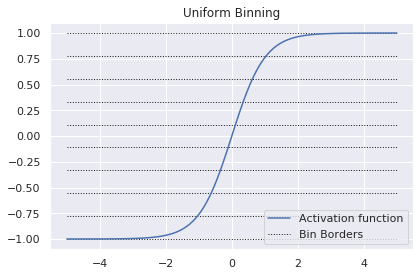

In [3]:
plt.plot(in_array, out_array, label="Activation function") 
plt.title("Uniform Binning") 
plt.xlabel("") 
plt.ylabel("") 
for y in bins[:-1]:
    plt.hlines(y, -5, 5, linewidth=1, linestyles="dotted")
plt.hlines(bins[-1], -5, 5, linewidth=1, linestyles="dotted", label="Bin Borders")
plt.legend(loc="lower right")
plt.tight_layout()
#plt.show()
plt.savefig("uniform_bins.png", dpi=700)

In [4]:
import pickle
with open("../mains/bins.pickle", 'rb') as f:
    bins_ars = pickle.load(f)
    f.close()
    
adapt_bins = bins_ars[-3000][-2]

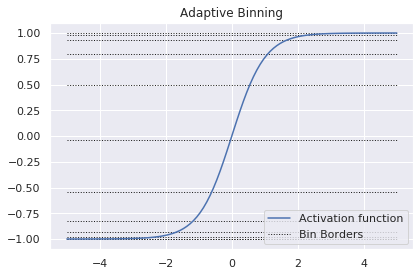

In [5]:
plt.plot(in_array, out_array, label="Activation function") 
plt.title("Adaptive Binning") 
plt.xlabel("") 
plt.ylabel("") 

for y in adapt_bins[:-1]:
    plt.hlines(y, -5, 5, linewidth=1, linestyles="dotted")
plt.hlines(adapt_bins[-1], -5, 5, linewidth=1, linestyles="dotted", label="Bin Borders")
plt.legend(loc="lower right")
plt.tight_layout()
#plt.show() 
plt.savefig("adaptive_bins.png", dpi=700)

In [6]:
with open("../data/max_stuff/max_values17_256.pickle", 'rb') as f:
    max_vals = pickle.load(f)
    f.close()

In [7]:
max_vals = np.array(max_vals)

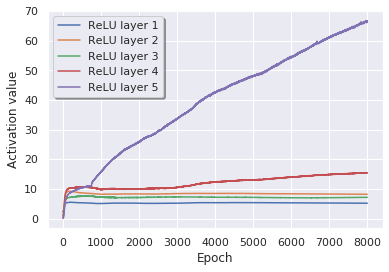

In [8]:
fig = plt.figure()
ax = plt.subplot(111)
for idx, i in enumerate(max_vals.T[:-1]):
    ax.plot(i, label = "ReLU layer {}".format(idx+1))
ax.set_xlabel("Epoch")
ax.set_ylabel("Activation value")

ax.legend(loc="best",fancybox=True, shadow=True)

In [9]:
fig.savefig("act_layers.png")

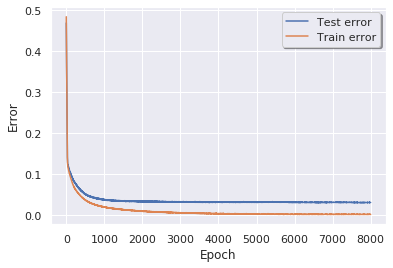

In [10]:
RANGE = 40
ext = "256"
data_path = "../data/tanh_adaptive_30_/"
full_error_train = np.zeros(RANGE,  dtype=object)
full_error_test = np.zeros(RANGE,  dtype=object)
for i in range(RANGE):
	with open(data_path + 'training_history_run_{}_{}.pickle'.format(i,ext), 'rb') as f:
		error_train, error_test = pickle.load(f)
		full_error_train[i] = np.array(error_train)
		full_error_test[i] = np.array(error_test)

avg_error_train = 1-(np.mean(full_error_train, axis = -1)/-3277) # old version where i saved 1-number of correct instead of accuracy. Fixed now.
avg_error_test = np.mean(full_error_test, axis = -1)

fig = plt.figure()
ax = plt.subplot(111)

ax.plot(np.arange(len(avg_error_test)), avg_error_test, label="Test error")
ax.plot(np.arange(len(avg_error_test)), avg_error_train, label="Train error")
ax.legend(loc="best",fancybox=True, shadow=True)
fig.savefig("test.png", dpi=700)
ax.set_xlabel("Epoch")
ax.set_ylabel("Error")
fig.show()

In [11]:

def plot_error(exts, data_path, save_path, r):
    RANGE = r
    fig = plt.figure(figsize=(8,5))
    ax = plt.subplot(111)

    for ext in exts:
        full_error_train = np.zeros(RANGE,  dtype=object)
        full_error_test = np.zeros(RANGE,  dtype=object)
        for i in range(RANGE):
            with open(data_path + 'training_history_run_{}_{}.pickle'.format(i,ext), 'rb') as f:
                error_train, error_test = pickle.load(f)
                full_error_train[i] = np.array(error_train)
                full_error_test[i] = np.array(error_test)

        avg_error_train = 1-(np.mean(full_error_train, axis = -1)/-3277) # old version where i saved 1-number of    correct instead of accuracy. Fixed now.
        avg_error_test = np.mean(full_error_test, axis = -1)


        ax.plot(np.arange(len(avg_error_test)), avg_error_test, label="Test error - Batch size: {}".format(ext))
        ax.plot(np.arange(len(avg_error_test)), avg_error_train, label="Train error - Batch size: {}".format(ext))
   
    ax.legend(loc="best",fancybox=True, shadow=True)
    fig.savefig(save_path, dpi=700)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Error")
    fig.show()
    return

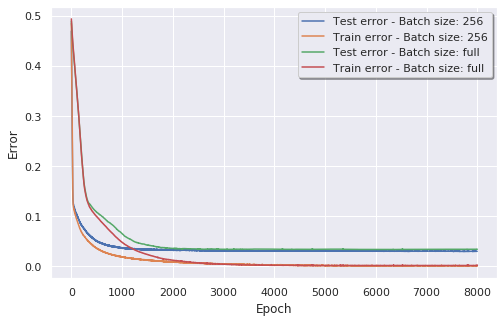

In [12]:
plot_error(["256", "full"], "../data/tanh_adaptive_30_/", "error_tanh_256.png", 40)

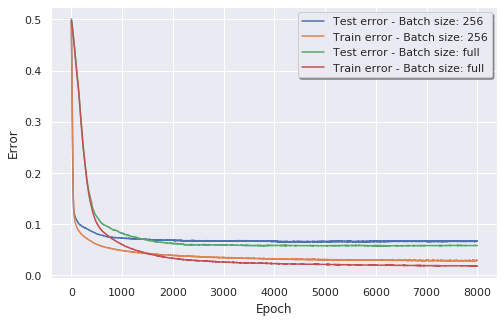

In [13]:
RANGE = 40
ext = "2568000[12, 10, 7, 5, 4, 3, 2]relu"
data_path = "/home/quantzz/BSc_Thesis/src/data_relu_256/"
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)

full_error_train = np.zeros(RANGE,  dtype=object)
full_error_test = np.zeros(RANGE,  dtype=object)
for i in range(RANGE):
    with open(data_path + 'trdata_run_{}_{}.pickle'.format(i,ext), 'rb') as f:
        error_train, error_test = pickle.load(f)
        full_error_train[i] = np.array(error_train)
        full_error_test[i] = np.array(error_test)

avg_error_train = 1-(np.mean(full_error_train, axis = -1)/-3277) # old version where i saved 1-number of    correct instead of accuracy. Fixed now.
avg_error_test = np.mean(full_error_test, axis = -1)


ax.plot(np.arange(len(avg_error_test)), avg_error_test, label="Test error - Batch size: 256")
ax.plot(np.arange(len(avg_error_test)), avg_error_train, label="Train error - Batch size: 256")


ext = "full8000[12, 10, 7, 5, 4, 3, 2]relu"
data_path = "/home/quantzz/BSc_Thesis/src/data_relu_full/" 
full_error_train = np.zeros(RANGE,  dtype=object)
full_error_test = np.zeros(RANGE,  dtype=object)
for i in range(RANGE):
    with open(data_path + 'trdata_run_{}_{}.pickle'.format(i,ext), 'rb') as f:
        error_train, error_test = pickle.load(f)
        full_error_train[i] = np.array(error_train)
        full_error_test[i] = np.array(error_test)

avg_error_train = 1-(np.mean(full_error_train, axis = -1)/-3277) # old version where i saved 1-number of    correct instead of accuracy. Fixed now.
avg_error_test = np.mean(full_error_test, axis = -1)


ax.plot(np.arange(len(avg_error_test)), avg_error_test, label="Test error - Batch size: full")
ax.plot(np.arange(len(avg_error_test)), avg_error_train, label="Train error - Batch size: full")

ax.legend(loc="best",fancybox=True, shadow=True)
ax.set_xlabel("Epoch")
ax.set_ylabel("Error")
fig.savefig("relu_error.png", dpi=700)
fig.show()

In [14]:
max_vals2 = []

In [15]:
for i in max_vals:
    max_vals2.append(i.max())


In [16]:
from collections import Counter
max_vals_256 = [20.628553, 23.40096, 12.558179, 2.1561344, 51.82339, 25.943825, 38.339085, 43.135033, 23.457582, 78.72383, 43.739132, 24.462122, 36.62319, 13.862715, 12.344459, 25.61324, 12.168928, 16.726175, 46.663143, 28.845692, 31.813265, 15.828995, 63.05508, 24.172821, 19.868414, 15.314455, 30.482254, 23.807362, 63.095123, 24.15069, 21.677345, 53.097794, 37.089592, 51.20914, 20.902552, 27.063944, 23.428076, 11.424805, 26.055439, 13.42807, 9.704986, 42.204105, 12.739449, 2.2452862, 28.483688, 32.078587, 39.14921, 122.6786, 13.358196, 25.961185]
max_cnts = Counter(max_vals_256[:40])

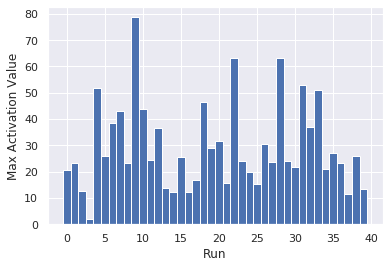

In [17]:
fig, ax = plt.subplots(1)
ax.set_ylabel("Max Activation Value")
ax.set_xlabel("Run")

ax.bar(range(len(max_cnts.values())), max_cnts.keys(), width=1)
fig.show()
fig.savefig("max_vals_256.png", dpi=700)

In [18]:
len(max_vals2)

8000

In [19]:
import sys
sys.path.insert(0,'../ibbsc')
import numpy as np
import pickle
import plot_utils

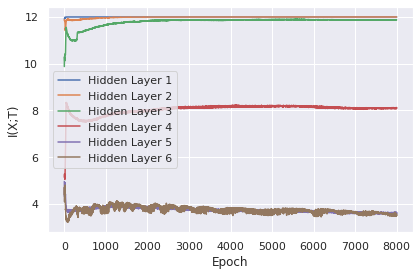

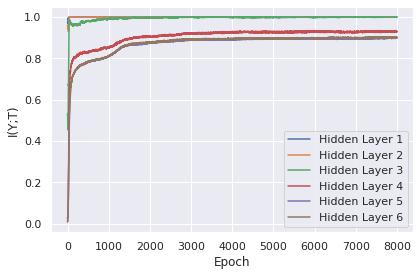

 10%|█         | 807/8000 [00:03<00:40, 175.63it/s]

KeyboardInterrupt: 

In [23]:
# Script to quickly see average mutual information 

def find_relu_compressing(sample):
    ext = "256_30adaptive"
    data_path = "../data/relu_adaptive_30/"
    # Read in all MI data from different runs
    full_MI_XH = np.zeros(1,  dtype=object)
    full_MI_YH = np.zeros(1,  dtype=object)
    with open(data_path + 'MI_XH_MI_YH_run_{}_{}.pickle'.format(sample,ext), 'rb') as f:
        MI_XH, MI_YH = pickle.load(f)
        full_MI_XH[0] = np.array(MI_XH)
        full_MI_YH[0] = np.array(MI_YH)

    avg_MI_XH = np.mean(full_MI_XH, axis = 0)
    avg_MI_YH = np.mean(full_MI_YH, axis = 0)


    plot_utils.plot_layer_MI(avg_MI_XH[:], "I(X;T)")
    plot_utils.plot_layer_MI(avg_MI_YH[:], "I(Y;T)")
    plot_utils.plot_info_plan(avg_MI_XH[:], avg_MI_YH[:])

    return


find_relu_compressing(1)